# UMAP & TSNE Plots

# Setup:

### Steps to perform before running this notebook:
- Connect to Drive


In [ ]:
!nvidia-smi
!ls
!pwd

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

sample_data
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Section TestSet

In [ ]:
Section_test_PPsD_global = "/content/drive/MyDrive/ProtoPNets/KS_YE/Section/testset_weighted_global_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Section_test_PPsD_local = "/content/drive/MyDrive/ProtoPNets/KS_YE/Section/testset_local_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"

### Section TraintSet

In [ ]:
Section_train_PPsD_global = "/content/drive/MyDrive/ProtoPNets/KS_YE/Section/trainingset_weighted_global_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Section_train_PPsD_local = "/content/drive/MyDrive/ProtoPNets/KS_YE/Section/trainingset_local_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"

### Surface TestSet

In [ ]:
Surface_test_PPsD_global = "/content/drive/MyDrive/ProtoPNets/KS_YE/Surface/testset_weighted_global_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Surface_test_PPsD_local = "/content/drive/MyDrive/ProtoPNets/KS_YE/Surface/testset_local_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"

### Surface TraintSet

In [ ]:
Surface_train_PPsD_global = "/content/drive/MyDrive/ProtoPNets/KS_YE/Surface/trainingset_weighted_global_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Surface_train_PPsD_local = "/content/drive/MyDrive/ProtoPNets/KS_YE/Surface/trainingset_local_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"

### Mixed TestSet

In [ ]:
#Mix_test_PPsD_global = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/testset_weighted_global_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
#Mix_test_PPsD_local = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/testset_local_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Mix_test_PPsD_global = "/content/drive/MyDrive/Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Mix_test_PPsD_local =  "/content/drive/MyDrive/Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv"

### Mixed TraintSet

In [ ]:
#Mix_train_PPsD_global = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/trainingset_weighted_global_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
#Mix_train_PPsD_local = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/trainingset_local_prototype_scores_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Mix_train_PPsD_global = "/content/drive/MyDrive/Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_weighted_global_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv"
Mix_train_PPsD_local = "/content/drive/MyDrive/Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtrainingset_local_descriptors_score_0.45_0.7_0.1_4_0.05_4_0.8.csv"

### Logits Output csv


In [ ]:
#KSJE_6c_Mix_w256_test_outputs = "/content/drive/MyDrive/Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/KSJE_6c_Mix_w256_densenet201_015_pps3_OsDA_logits_df.csv"
KSJE_6c_Mix_w256_test_outputs = "/content/drive/MyDrive/Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/pps_results/JE_Mix_6c_w256_OsDA/densenet201_015_pps3/DenseNet201_logits_w256_JE_6c_Mix_003pps_OscarDA.csv"

## Loading libraries



In [ ]:
!pip install scprep
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 35.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=95b221058c83a6b47590ac12a8d8d5b969f58dbc2837ff83f25592601f90d899
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=33464f1c07e94d8f458341a23b5667cf18670cb75727e5aaa03a996b271a4d58
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torchvision import transforms, utils
import seaborn as sns
import skimage.io as io

from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

import scprep
import umap
import sklearn.manifold

# umap_plot Definition

In [ ]:
"""
Plots umap
"""
#def umap_plot(self, features_df, target_col, sample_size=None, labels=None, knn_neighbors=15, min_dist=0.1, dim='2d', random_state=None):
def umap_plot(features_df, target_col, sample_size=None, labels=None, knn_neighbors=15, min_dist=0.1, dim='2d', random_state=None):  
  x = features_df.drop(target_col, axis=1)

  if labels:
    y = features_df[target_col].map(labels)
  else:
    y = features_df[target_col]

  if not sample_size:
    sample_size = len(x)

  # apply pca to select the top 100 features and plot the graph faster.
  #max_features = min(len(x.columns), 100)
  #x_pca = scprep.reduce.pca(x, n_components=max_features, method='dense')
  #x, y = scprep.select.subsample(x_pca, y, n=sample_size, seed=random_state)

  if dim == '3d':
    umap_op = umap.UMAP(n_components=3, n_neighbors=knn_neighbors,
                        min_dist=min_dist, random_state=random_state)
    data_umap = umap_op.fit_transform(x)
    """
    # Vertical and Horizontal Grid Lines
    for h in np.unique(y):
      ax.axhline(h, c="k", linewidth=0.1, zorder=0)
    for v in np.unique(x):
      ax.axvline(v, c="k", linewidth=0.1, zorder=0)
    #"""
    scprep.plot.scatter3d(data_umap, c=y,
                        figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='umap_')

  else:
    umap_op = umap.UMAP(n_components=2, n_neighbors=knn_neighbors,
                        min_dist=min_dist, random_state=random_state)
    data_umap = umap_op.fit_transform(x)
    scprep.plot.scatter2d(data_umap, c=y,
                        figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='umap_')
  return data_umap, y, umap_op
    

# Loading the data 
###   And libraries

In [ ]:
import pandas as pd
from numpy import genfromtxt

#Section_test_PPsD_global
#Section_test_PPsD_local
#
#Section_train_PPsD_global
#Section_train_PPsD_local


#Surface_test_PPsD_global
#Surface_test_PPsD_local
#
#Surface_train_PPsD_global
#Surface_train_PPsD_local


# Mix_test_PPsD_global
# Mix_test_PPsD_local
#
# Mix_train_PPsD_global
# Mix_train_PPsD_local

# read csv 
array_PPdescrip_global = genfromtxt(Mix_test_PPsD_global, delimiter=',')  #
array_PPdescrip_local = genfromtxt(Mix_test_PPsD_local, delimiter=',')   #
#array_PPdescrip_local = genfromtxt(KSJE_6c_Mix_w256_test_outputs, delimiter=',')

###### Loading Output csv's
df_array_KSYE_2k_Mix_test_outputs = pd.read_csv(KSJE_6c_Mix_w256_test_outputs)
array_KSYE_2k_Mix_test_outputs = genfromtxt(KSJE_6c_Mix_w256_test_outputs, delimiter=',') 


In [ ]:
df_array_KSYE_2k_Mix_test_outputs.nunique()

subdir              6
filename         2400
predicted_cls       6
correct_cls         6
F4               2399
F5               2400
F6               2400
F7               2400
F8               2400
F9               2400
dtype: int64

In [ ]:
df_array_KSYE_2k_Mix_test_outputs

,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9
0,MIX-Subtype_Ia,14811 - section 1-1.png,4,4,-4.762806,-12.357465,-6.570512,-5.352190,6.374973,-8.176288
1,MIX-Subtype_Ia,14811 - section 1-10.png,4,4,-4.217830,-9.792542,-7.454663,-5.823901,3.157254,-7.678110
2,MIX-Subtype_Ia,14811 - section 1-11.png,4,4,-4.411952,-11.378701,-8.699482,-6.320522,6.390824,-8.887551
3,MIX-Subtype_Ia,14811 - section 1-12.png,4,4,-3.921875,-11.365043,-8.088356,-6.036555,5.423798,-7.592276
4,MIX-Subtype_Ia,14811 - section 1-13.png,4,4,-5.142592,-12.120624,-9.626263,-7.004844,6.163960,-7.837791
...,...,...,...,...,...,...,...,...,...,...
2395,MIX-Subtype_Va,4066 - surface 4-5.png,5,5,-4.248386,-11.273198,-8.080029,-6.296717,-4.201184,3.311113
2396,MIX-Subtype_Va,4066 - surface 4-6.png,5,5,-5.144184,-12.830399,-8.950605,-7.015563,-5.066028,5.370039
2397,MIX-Subtype_Va,4066 - surface 4-7.png,5,5,-6.602128,-12.291159,-10.784968,-8.321315,-6.947129,6.133261
2398,MIX-Subtype_Va,4066 - surface 4-8.png,5,5,-5.361039,-11.012855,-9.536087,-7.305217,-5.454185,3.871416


In [ ]:
# Get the unique values of 'image' column
array_imgs_names_list = df_array_KSYE_2k_Mix_test_outputs['filename'].unique()
df_imgs_names_list = pd.DataFrame(df_array_KSYE_2k_Mix_test_outputs['filename'].unique())
# adding column name to the column
df_imgs_names_list.columns =['image'] 
df_imgs_names_list

,image
0,14811 - section 1-1.png
1,14811 - section 1-10.png
2,14811 - section 1-11.png
3,14811 - section 1-12.png
4,14811 - section 1-13.png
...,...
2395,4066 - surface 4-5.png
2396,4066 - surface 4-6.png
2397,4066 - surface 4-7.png
2398,4066 - surface 4-8.png


In [ ]:
# array_PPdescrip_global 
# array_PPdescrip_local

local_Descriptor = np.delete(array_PPdescrip_local, 0, 0)
local_Descriptor = np.delete(local_Descriptor, [0,1,2], 1)
#print(local_Descriptor)

n_PPs_perClass = 3 #10
Number_of_Classes = 6
PPs_number = n_PPs_perClass * Number_of_Classes

n_descriptores = 6
n_DescriptoresPlus1 = n_descriptores +1
Imgs_per_class = 400
Total_of_imgs = Imgs_per_class*Number_of_Classes
# Just columns of PPs+D describing imgs: 60 PPs with 6 descriptors each, each PPs has it's activation (1) and 6 descriptors (1+6), total of 60*(1+6)
# Just columns of PPs+D describing imgs: 18 PPs with 6 descriptors each, each PPs has it's activation (1) and 6 descriptors (1+6), total of 18*(1+6)
s = (   (Total_of_imgs), (PPs_number*n_DescriptoresPlus1 )  ) 
PPs_plus_Descriptor_vectors_of_imgs = np.zeros(s)

# Just columns of PPs (a total of 18 PPs) per each image (there are 2400 imgs)
matrix_imgs_x_PPs_number = (  (Total_of_imgs), (PPs_number)  )
PPs_vectors_of_imgs = np.zeros(matrix_imgs_x_PPs_number)

# Matrix with 1 column and a total number of rows as images in the testset: 
# there are 400 images per class and 6 classes for a total of 2,400 images in the JE testset
s2 = ( (Total_of_imgs  ), 1) 
indices_images = np.zeros(s2)

# Total of columns are: the columns of PPs+D describing imgs plus 1 column indicating the real class of the Img
s3 = ( PPs_number*(n_DescriptoresPlus1)+1)
columns_index = np.zeros(s3)

# loop over the total number of different images (400 img per class and 6 different classes, total of 2,400)
for i in range(Total_of_imgs):
  #print(i)
  if i < Imgs_per_class:
    indices_images[i,0] = 0 
  if (i >=   Imgs_per_class) and (i < (2*Imgs_per_class)):
    indices_images[i,0] = 1
  if (i >= 2*Imgs_per_class) and (i < (3*Imgs_per_class)):
    indices_images[i,0] = 2
  if (i >= 3*Imgs_per_class) and (i < (4*Imgs_per_class)):
    indices_images[i,0] = 3
  if (i >= 4*Imgs_per_class) and (i < (5*Imgs_per_class)):
    indices_images[i,0] = 4
  if (i >= 5*Imgs_per_class) and (i < (6*Imgs_per_class)):
    indices_images[i,0] = 5

  for pp_index in range(PPs_number):
    PPs_plus_Descriptor_vectors_of_imgs[i, pp_index*n_DescriptoresPlus1] = local_Descriptor[ (i*PPs_number*n_descriptores+pp_index), 1]
    PPs_vectors_of_imgs[i, pp_index] = local_Descriptor[ (i*PPs_number*n_descriptores+pp_index), 1]
    if i == 0:
      columns_index[ pp_index*n_DescriptoresPlus1 ] = pp_index

    for descriptor_index in range(n_descriptores):
      PPs_plus_Descriptor_vectors_of_imgs[i, (pp_index*n_DescriptoresPlus1  +1+descriptor_index) ] = local_Descriptor[ pp_index +descriptor_index*(PPs_number) +i*PPs_number*n_descriptores, 0]
      if i == 0:
        #print((pp_index*n_DescriptoresPlus1  +1+descriptor_index))
        columns_index[ (pp_index*n_DescriptoresPlus1  +1+descriptor_index) ] = (pp_index*n_DescriptoresPlus1  +1+descriptor_index)


PPs_plus_Descriptor_vectors_of_imgs.shape
#print(Class_Descriptor_vectors)

(2400, 126)

In [ ]:
PPs_vectors_of_imgs.shape

(2400, 18)

# PPs+Descriptors: To generate Per Class visualizations of Imgs described by their PPs+Descriptors 
## For local data

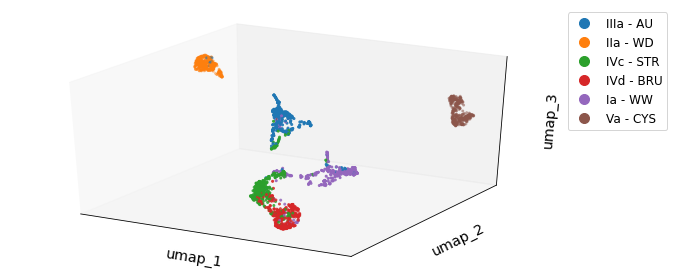

In [ ]:
PPs_plus_Descriptors_perImgs = np.c_[ PPs_plus_Descriptor_vectors_of_imgs, indices_images] 
#PPs_plus_Descriptors_perImgs[25,420] = 6

df_PPnD = pd.DataFrame(PPs_plus_Descriptors_perImgs)
df_PPnD.columns=["F"+str(i) for i in range(1, len(df_PPnD.columns) + 1)]

last_column = "F"+str(len(df_PPnD.columns))
#print(last_column)
df_PPnD = df_PPnD.rename(columns={last_column: 'Class'})

#df_PPnD['Class'] = df_PPnD['Class'].map({0: 'IIIa - AU', 1: 'IIa - WD', 2: 'IVc - STR', 3: 'IVd - BRU', 4: 'Ia - WW', 5: 'Va - CYS'})#, 6: 'AU_test'})
df_PPnD['Class'] = df_PPnD['Class'].map({0: 'Ia - WW', 1: 'IIa - WD', 2: 'IIIa - AU' , 3: 'IVc - STR', 4: 'IVd - BRU', 5: 'Va - CYS'})#, 6: 'AU_test'})
#print(df_PPnD.head)

# PLOT UMAP IN 3D
data_umap, y_umap_target, umap_pps_n_descriptors_transform = umap_plot(features_df = df_PPnD, #dataframe               
                      target_col='Class', # "target" column. It is the one that contains the class name.
                      dim="3d", #2d or 3d
                      knn_neighbors= 10, #10, # controls how UMAP balances local versus global structure in the data
                      min_dist=0.08, #0.1, #min_dist=0.5, # controls how tightly UMAP is allowed to pack points together
                      #sample_size=MAX_REC, #Max number of samples (optional)
                      random_state= 2#2
                      )

In [ ]:
umap_pps_n_descriptors_transform

UMAP(min_dist=0.08, n_components=3, n_neighbors=10, random_state=2, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
data_umap.shape

(2400, 3)

In [ ]:
df_PPnD

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F118,F119,F120,F121,F122,F123,F124,F125,F126,Class
0,1.694967,0.855248,0.680913,0.725869,1.376386,0.806195,0.575286,0.496653,0.045308,-0.032379,...,-1.037046,0.883504,2.212826,1.263194,1.026264,1.292319,1.906354,1.316399,0.853909,Ia - WW
1,1.757141,0.046324,-0.217447,1.210200,1.406602,0.908821,1.120550,0.777137,0.579908,0.484542,...,1.954679,2.062875,2.506873,0.464543,-0.405982,1.989364,2.166293,1.689173,1.817846,Ia - WW
2,1.878429,-0.103243,0.842804,1.479380,1.601305,1.720106,1.164456,0.805574,0.410215,0.440459,...,0.481593,1.868996,2.328388,1.482879,0.347065,1.217528,1.980394,0.253021,1.588328,Ia - WW
3,1.948664,0.115965,0.453931,1.433096,1.750061,1.766257,0.877097,0.775267,0.399408,0.476566,...,2.575883,1.837415,2.575278,0.721684,1.225738,2.174005,2.390225,2.406659,1.642575,Ia - WW
4,2.100214,1.900776,1.532840,1.496458,1.336647,1.787980,1.524418,0.612155,0.165702,0.297558,...,3.149910,1.216539,3.178829,1.407389,0.698883,2.874785,0.053297,2.982160,1.047329,Ia - WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1.976955,0.248589,0.960879,0.745017,1.171896,0.003651,0.675151,0.516741,0.045853,0.144018,...,0.695622,0.961289,4.305286,-0.729913,1.993753,3.191262,3.766172,1.105001,0.514573,Va - CYS
2396,1.983197,1.092073,0.875516,0.494787,0.759502,-0.020624,0.435418,0.523099,-0.041244,-0.080044,...,1.159031,2.647125,4.778732,3.550690,3.929931,3.437254,2.846083,2.535662,3.378944,Va - CYS
2397,1.956005,-0.000736,0.001847,0.834446,1.340445,0.000298,0.982483,0.505104,-0.002639,0.015042,...,0.486408,0.819462,5.097317,1.991271,0.892062,2.382236,1.440985,1.925364,3.237672,Va - CYS
2398,1.978081,0.004837,0.001718,0.216246,0.952703,-0.002934,0.000041,0.508272,-0.006530,-0.000827,...,1.207732,2.034723,6.279511,4.556500,4.279683,3.795540,1.958418,3.137229,3.275654,Va - CYS


## Saving with np on colab env:

In [ ]:
PPs_plus_Descriptors_perImgs_firstColumn = np.c_[indices_images, PPs_plus_Descriptor_vectors_of_imgs] 
np.savetxt('KS_YE_Section_test_PPnDlocal_perImgs_firstColumn.csv', PPs_plus_Descriptors_perImgs_firstColumn, delimiter=",")
PPs_plus_Descriptors_perImgs.shape

(2400, 127)

In [ ]:
PPs_plus_Descriptors_perImgs_lastColumn = np.c_[ PPs_plus_Descriptor_vectors_of_imgs, indices_images] 
np.savetxt('KS_YE_Section_test_PPnDlocal_perImgs_lastColumn.csv', PPs_plus_Descriptors_perImgs_lastColumn, delimiter=",")
PPs_plus_Descriptors_perImgs.shape

(2400, 127)

## Saving with Pandas on Drive:

In [ ]:
PPs_plus_Descriptors_perImgs_firstColumn = np.c_[ indices_images, PPs_plus_Descriptor_vectors_of_imgs] 
PPs_plus_Descriptors_perImgs_lastColumn  = np.c_[ PPs_plus_Descriptor_vectors_of_imgs, indices_images] 

In [ ]:
#dir_pandas_first = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/{}".format('KS_YE_Mix_train_PPsnD_local_perImgs_firstColumn.csv')
#dir_pandas_last = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/{}".format('KS_YE_Mix_train_PPsnD_local_perImgs_lastColumn.csv')

In [ ]:
dir_pandas_first = "/content/drive/MyDrive/{}".format('Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_perImgs_firstColumn.csv')
dir_pandas_last = "/content/drive/MyDrive/{}".format('Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_perImgs_lastColumn.csv')

In [ ]:
df_simple_PPnD_on_Imgs_perClass_FirstColumn = pd.DataFrame(PPs_plus_Descriptors_perImgs_firstColumn)
df_simple_PPnD_on_Imgs_perClass_LastColumn = pd.DataFrame(PPs_plus_Descriptors_perImgs_lastColumn)

In [ ]:
df_simple_PPnD_on_Imgs_perClass_FirstColumn.to_csv(dir_pandas_first)
df_simple_PPnD_on_Imgs_perClass_LastColumn.to_csv(dir_pandas_last)

# plotly interactive plot
# PPs+Descriptors

In [ ]:
data_umap.shape

(2400, 3)

In [ ]:
data_umap

array([[11.359987  ,  0.58895737,  1.5307095 ],
       [10.941387  ,  0.45153403,  1.9904579 ],
       [11.138479  ,  0.05145307,  1.9752058 ],
       ...,
       [11.386488  , 13.408666  ,  2.9270344 ],
       [12.426061  , 13.748621  ,  2.987486  ],
       [12.429018  , 13.758972  ,  3.0940955 ]], dtype=float32)

In [ ]:
y_umap_target

0        Ia - WW
1        Ia - WW
2        Ia - WW
3        Ia - WW
4        Ia - WW
          ...   
2395    Va - CYS
2396    Va - CYS
2397    Va - CYS
2398    Va - CYS
2399    Va - CYS
Name: Class, Length: 2400, dtype: object

In [ ]:
PPnD_UmapData = np.c_[ y_umap_target, data_umap]
df_PPnD_UmapData = pd.DataFrame(PPnD_UmapData)
df_PPnD_UmapData.columns=["F"+str(i) for i in range(len(df_PPnD_UmapData.columns))]
df_PPnD_UmapData = df_PPnD_UmapData.rename(columns={"F0": 'Class'})
df_PPnD_UmapData

,Class,F1,F2,F3
0,Ia - WW,11.359987,0.588957,1.53071
1,Ia - WW,10.941387,0.451534,1.990458
2,Ia - WW,11.138479,0.051453,1.975206
3,Ia - WW,10.832262,-0.127035,2.141899
4,Ia - WW,11.702085,-0.178868,2.098991
...,...,...,...,...
2395,Va - CYS,12.226527,13.513512,3.063237
2396,Va - CYS,11.890603,13.758824,2.654148
2397,Va - CYS,11.386488,13.408666,2.927034
2398,Va - CYS,12.426061,13.748621,2.987486


In [ ]:
import plotly.express as px
#df = px.data.iris()
#fig = px.scatter_3d(df, x='Umap1', y='Umap2', z='Umap3', color='species')

#df_PPnD_UmapData
fig = px.scatter_3d(df_PPnD_UmapData, x='F1', y='F2', z='F3',
                    color='Class'
                    )
fig.update_traces(marker={'size': 1.2})
fig.show()

In [ ]:
PPnD_UmapData.shape

(2400, 4)

In [ ]:
Umap_row_numeration = [i for i in range(0, (PPnD_UmapData.shape[0]))]
PPnD_UmapData_row_numeration = np.c_[ Umap_row_numeration, PPnD_UmapData]

df_PPnD_UmapData_row_numeration = pd.DataFrame(PPnD_UmapData_row_numeration)
df_PPnD_UmapData_row_numeration.columns=["F"+str(i) for i in range(-1,len(df_PPnD_UmapData.columns))]
df_PPnD_UmapData_row_numeration = df_PPnD_UmapData_row_numeration.rename(columns={"F-1": 'Numberation', "F0": 'Class'})
df_PPnD_UmapData_row_numeration

,Numberation,Class,F1,F2,F3
0,0,Ia - WW,11.359987,0.588957,1.53071
1,1,Ia - WW,10.941387,0.451534,1.990458
2,2,Ia - WW,11.138479,0.051453,1.975206
3,3,Ia - WW,10.832262,-0.127035,2.141899
4,4,Ia - WW,11.702085,-0.178868,2.098991
...,...,...,...,...,...
2395,2395,Va - CYS,12.226527,13.513512,3.063237
2396,2396,Va - CYS,11.890603,13.758824,2.654148
2397,2397,Va - CYS,11.386488,13.408666,2.927034
2398,2398,Va - CYS,12.426061,13.748621,2.987486


In [ ]:
df_umap_plus_output = pd.concat([df_PPnD_UmapData_row_numeration, df_array_KSYE_2k_Mix_test_outputs], axis=1)
df_umap_plus_img_name = pd.concat([df_imgs_names_list, df_PPnD_UmapData_row_numeration], axis=1)
df_umap_plus_img_name

,image,Numberation,Class,F1,F2,F3
0,14811 - section 1-1.png,0,Ia - WW,11.359987,0.588957,1.53071
1,14811 - section 1-10.png,1,Ia - WW,10.941387,0.451534,1.990458
2,14811 - section 1-11.png,2,Ia - WW,11.138479,0.051453,1.975206
3,14811 - section 1-12.png,3,Ia - WW,10.832262,-0.127035,2.141899
4,14811 - section 1-13.png,4,Ia - WW,11.702085,-0.178868,2.098991
...,...,...,...,...,...,...
2395,4066 - surface 4-5.png,2395,Va - CYS,12.226527,13.513512,3.063237
2396,4066 - surface 4-6.png,2396,Va - CYS,11.890603,13.758824,2.654148
2397,4066 - surface 4-7.png,2397,Va - CYS,11.386488,13.408666,2.927034
2398,4066 - surface 4-8.png,2398,Va - CYS,12.426061,13.748621,2.987486


In [ ]:
df_umap_plus_output

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9
0,0,Ia - WW,11.359987,0.588957,1.53071,MIX-Subtype_Ia,14811 - section 1-1.png,4,4,-4.762806,-12.357465,-6.570512,-5.352190,6.374973,-8.176288
1,1,Ia - WW,10.941387,0.451534,1.990458,MIX-Subtype_Ia,14811 - section 1-10.png,4,4,-4.217830,-9.792542,-7.454663,-5.823901,3.157254,-7.678110
2,2,Ia - WW,11.138479,0.051453,1.975206,MIX-Subtype_Ia,14811 - section 1-11.png,4,4,-4.411952,-11.378701,-8.699482,-6.320522,6.390824,-8.887551
3,3,Ia - WW,10.832262,-0.127035,2.141899,MIX-Subtype_Ia,14811 - section 1-12.png,4,4,-3.921875,-11.365043,-8.088356,-6.036555,5.423798,-7.592276
4,4,Ia - WW,11.702085,-0.178868,2.098991,MIX-Subtype_Ia,14811 - section 1-13.png,4,4,-5.142592,-12.120624,-9.626263,-7.004844,6.163960,-7.837791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,Va - CYS,12.226527,13.513512,3.063237,MIX-Subtype_Va,4066 - surface 4-5.png,5,5,-4.248386,-11.273198,-8.080029,-6.296717,-4.201184,3.311113
2396,2396,Va - CYS,11.890603,13.758824,2.654148,MIX-Subtype_Va,4066 - surface 4-6.png,5,5,-5.144184,-12.830399,-8.950605,-7.015563,-5.066028,5.370039
2397,2397,Va - CYS,11.386488,13.408666,2.927034,MIX-Subtype_Va,4066 - surface 4-7.png,5,5,-6.602128,-12.291159,-10.784968,-8.321315,-6.947129,6.133261
2398,2398,Va - CYS,12.426061,13.748621,2.987486,MIX-Subtype_Va,4066 - surface 4-8.png,5,5,-5.361039,-11.012855,-9.536087,-7.305217,-5.454185,3.871416


In [ ]:
!pip install kaleido
import kaleido #required
kaleido.__version__ #0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 136 kB/s 


'0.2.1'

In [ ]:
#!pip install -U kaleido

import os
#import kaleido
import plotly.express as px

#df_PPnD_UmapData
#fig = px.scatter_3d(df_PPnD_UmapData_row_numeration, x='F1', y='F2', z='F3',
#fig = plt.gcf()
fig = px.scatter_3d(df_umap_plus_img_name, x='F1', y='F2', z='F3',
                    color='Class', #smoker #Class
                    #hover_data={'Numberation': True, 'subdir': True, 'filename': True,'predicted_cls': True,'correct_cls': True},
                    hover_data={'Numberation': True, 'image': True},
                    width =1200, 
                    height=1000,
                    #colorscale="Viridis",
                    )
fig.update_traces(marker= dict(size = 3.8, line=dict(width=2, color='darkslateblue'))  )
fig.update_layout(legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  legend_title = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  #gridcolor='black'
                  )
fig.update_scenes(xaxis_gridcolor="black", yaxis_gridcolor="black", zaxis_gridcolor="black",
                  xaxis_gridwidth=1.5,     yaxis_gridwidth=1.5,     zaxis_gridwidth=1.5,
                  )

#fig.write_image("figure.pdf", engine="kaleido")
fig.show()

In [ ]:
##fig.write_image("fig1.svg")
import plotly
plotly.offline.plot(fig, image_filename="fig1", image='svg')
#iplot(fig, image='svg', filename='scatterplot.svg', image_width=1280, image_height=1280)
#px.offline.plot(fig, image_filename="fig1", image='svg')

'temp-plot.html'

In [ ]:
#fig.write_image("fig1.pdf")

#px.offline.plot(fig, image_filename="20221104_ProtoPNet_DenseNet201_015_3pps_JE_Mix_6c_w256", image='svg')

### might need to wait for plot to download before copying
#time.sleep(1)

In [ ]:
# Derive a new column from existing column
#df_umap_plus_output['Wrong_output'] = np.select([df_umap_plus_output.predicted_cls == df_umap_plus_output.correct_cls , df_umap_plus_output.predicted_cls != df_umap_plus_output.correct_cls], [0, 1], default = -1)
df_umap_plus_output['Wrong_output'] = np.select([df_umap_plus_output.predicted_cls == df_umap_plus_output.correct_cls , df_umap_plus_output.predicted_cls != df_umap_plus_output.correct_cls], [0, 1], default = -1)
#df_array_KSYE_2k_Mix_test_outputs

#df_umap_plus_output['Wrong_output'] = 1 if (df_umap_plus_output['predicted_cls'] == df['correct_cls'])
df_umap_plus_output

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9,Wrong_output
0,0,Ia - WW,11.359987,0.588957,1.53071,MIX-Subtype_Ia,14811 - section 1-1.png,4,4,-4.762806,-12.357465,-6.570512,-5.352190,6.374973,-8.176288,0
1,1,Ia - WW,10.941387,0.451534,1.990458,MIX-Subtype_Ia,14811 - section 1-10.png,4,4,-4.217830,-9.792542,-7.454663,-5.823901,3.157254,-7.678110,0
2,2,Ia - WW,11.138479,0.051453,1.975206,MIX-Subtype_Ia,14811 - section 1-11.png,4,4,-4.411952,-11.378701,-8.699482,-6.320522,6.390824,-8.887551,0
3,3,Ia - WW,10.832262,-0.127035,2.141899,MIX-Subtype_Ia,14811 - section 1-12.png,4,4,-3.921875,-11.365043,-8.088356,-6.036555,5.423798,-7.592276,0
4,4,Ia - WW,11.702085,-0.178868,2.098991,MIX-Subtype_Ia,14811 - section 1-13.png,4,4,-5.142592,-12.120624,-9.626263,-7.004844,6.163960,-7.837791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,Va - CYS,12.226527,13.513512,3.063237,MIX-Subtype_Va,4066 - surface 4-5.png,5,5,-4.248386,-11.273198,-8.080029,-6.296717,-4.201184,3.311113,0
2396,2396,Va - CYS,11.890603,13.758824,2.654148,MIX-Subtype_Va,4066 - surface 4-6.png,5,5,-5.144184,-12.830399,-8.950605,-7.015563,-5.066028,5.370039,0
2397,2397,Va - CYS,11.386488,13.408666,2.927034,MIX-Subtype_Va,4066 - surface 4-7.png,5,5,-6.602128,-12.291159,-10.784968,-8.321315,-6.947129,6.133261,0
2398,2398,Va - CYS,12.426061,13.748621,2.987486,MIX-Subtype_Va,4066 - surface 4-8.png,5,5,-5.361039,-11.012855,-9.536087,-7.305217,-5.454185,3.871416,0


In [ ]:
# Derive a new column from existing column
df_umap_plus_output['Wrong_output_opacity'] = np.select([df_umap_plus_output.predicted_cls == df_umap_plus_output.correct_cls , df_umap_plus_output.predicted_cls != df_umap_plus_output.correct_cls], [0.4, 0.99], default = -1)

#df_umap_plus_output['Wrong_output'] = 1 if (df_umap_plus_output['predicted_cls'] == df['correct_cls'])
df_umap_plus_output

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9,Wrong_output,Wrong_output_opacity
0,0,Ia - WW,11.359987,0.588957,1.53071,MIX-Subtype_Ia,14811 - section 1-1.png,4,4,-4.762806,-12.357465,-6.570512,-5.352190,6.374973,-8.176288,0,0.4
1,1,Ia - WW,10.941387,0.451534,1.990458,MIX-Subtype_Ia,14811 - section 1-10.png,4,4,-4.217830,-9.792542,-7.454663,-5.823901,3.157254,-7.678110,0,0.4
2,2,Ia - WW,11.138479,0.051453,1.975206,MIX-Subtype_Ia,14811 - section 1-11.png,4,4,-4.411952,-11.378701,-8.699482,-6.320522,6.390824,-8.887551,0,0.4
3,3,Ia - WW,10.832262,-0.127035,2.141899,MIX-Subtype_Ia,14811 - section 1-12.png,4,4,-3.921875,-11.365043,-8.088356,-6.036555,5.423798,-7.592276,0,0.4
4,4,Ia - WW,11.702085,-0.178868,2.098991,MIX-Subtype_Ia,14811 - section 1-13.png,4,4,-5.142592,-12.120624,-9.626263,-7.004844,6.163960,-7.837791,0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,Va - CYS,12.226527,13.513512,3.063237,MIX-Subtype_Va,4066 - surface 4-5.png,5,5,-4.248386,-11.273198,-8.080029,-6.296717,-4.201184,3.311113,0,0.4
2396,2396,Va - CYS,11.890603,13.758824,2.654148,MIX-Subtype_Va,4066 - surface 4-6.png,5,5,-5.144184,-12.830399,-8.950605,-7.015563,-5.066028,5.370039,0,0.4
2397,2397,Va - CYS,11.386488,13.408666,2.927034,MIX-Subtype_Va,4066 - surface 4-7.png,5,5,-6.602128,-12.291159,-10.784968,-8.321315,-6.947129,6.133261,0,0.4
2398,2398,Va - CYS,12.426061,13.748621,2.987486,MIX-Subtype_Va,4066 - surface 4-8.png,5,5,-5.361039,-11.012855,-9.536087,-7.305217,-5.454185,3.871416,0,0.4


In [ ]:
print(df_umap_plus_output.nunique())
print(" ")
print("------------------------------- ")
print(df_umap_plus_output.dtypes)
print(" ")
print("------------------------------- ")
df_umap_plus_output['Wrong_output_opacity'].unique()

Numberation             2400
Class                      6
F1                      2400
F2                      2400
F3                      2400
subdir                     6
filename                2400
predicted_cls              6
correct_cls                6
F4                      2399
F5                      2400
F6                      2400
F7                      2400
F8                      2400
F9                      2400
Wrong_output               2
Wrong_output_opacity       2
dtype: int64
 
------------------------------- 
Numberation              object
Class                    object
F1                       object
F2                       object
F3                       object
subdir                   object
filename                 object
predicted_cls             int64
correct_cls               int64
F4                      float64
F5                      float64
F6                      float64
F7                      float64
F8                      float64
F9         

array([0.4 , 0.99])

In [ ]:
# df_PPnD_UmapData
# df_PPnD_UmapData_row_numeration
#df_umap_plus_output
np_Wrong_output_opacity = df_umap_plus_output['Wrong_output_opacity'].to_numpy()
fig = px.scatter_3d(df_umap_plus_output, x='F1', y='F2', z='F3',
                    color='Class',
                    hover_data={'Numberation': True, 'subdir': True, 'filename': True,'predicted_cls': True,'correct_cls': True},
                    #opacity= np_Wrong_output_opacity, #0.7, #'Wrong_output_opacity', #df_umap_plus_output['Wrong_output'], #0.7, #'Wrong_output_opacity',
                    symbol='Wrong_output',
                    width =1200, 
                    height=1000,
                    #showarrow = True,
                    #fillcolor='rgba(26,150,65,0.5)',
                    )
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  legend_title = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  )
fig.update_traces(marker= dict(size = 5.8, line=dict(width=2, color='darkslateblue')), ) #Viridis #darkslateblue #colorscale='Viridis',  
#fig.update_layout(legend = dict(font = dict(family = "Arial", size = 15, color = "black")), legend_title = dict(font = dict(family = "Arial", size = 15, color = "black")), )
                  #gridcolor='black' )
fig.update_scenes(xaxis_gridcolor="black", yaxis_gridcolor="black", zaxis_gridcolor="black",
                  xaxis_gridwidth=1.5,     yaxis_gridwidth=1.5,     zaxis_gridwidth=1.5,
                  )
#fig.defaults.color_continuous_scale = df_umap_plus_output['Wrong_output']
#fig.color_continuous_scale = df_umap_plus_output['Wrong_output']
#layout.scene.annotations[]
fig.show()

In [ ]:
test = np.linspace(0, 20, 100)
test#.shape

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [ ]:
np_Wrong_output_opacity

array([0.4, 0.4, 0.4, ..., 0.4, 0.4, 0.4])

In [ ]:
#count unique 'points' values, grouped by team
print(df_umap_plus_output.groupby('Class')['Wrong_output'].nunique())
print(" ")
print("------------------------------- ")
print(df_umap_plus_output.groupby('Class')['Wrong_output'].unique())
print(" ")
print("------------------------------- ")
df_umap_plus_output.groupby('Class')['Wrong_output'].sum() #axis=0)
#df_umap_plus_output.groupby('Wrong_output')['Class'].nunique()

Class
IIIa - AU    2
IIa - WD     1
IVc - STR    2
IVd - BRU    2
Ia - WW      2
Va - CYS     2
Name: Wrong_output, dtype: int64
 
------------------------------- 
Class
IIIa - AU    [0, 1]
IIa - WD        [0]
IVc - STR    [0, 1]
IVd - BRU    [0, 1]
Ia - WW      [0, 1]
Va - CYS     [0, 1]
Name: Wrong_output, dtype: object
 
------------------------------- 


Class
IIIa - AU     40
IIa - WD       0
IVc - STR     76
IVd - BRU     74
Ia - WW      113
Va - CYS       2
Name: Wrong_output, dtype: int64

In [ ]:
df_umap_wrong_outputs = df_umap_plus_output[df_umap_plus_output['Wrong_output'] == 1]
df_umap_wrong_outputs

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9,Wrong_output,Wrong_output_opacity
5,5,Ia - WW,7.763875,-0.847691,1.191579,MIX-Subtype_Ia,14811 - section 1-14.png,2,4,-5.811856,-15.757483,-1.592553,-3.694532,-2.164226,-9.287083,1,0.99
14,14,Ia - WW,8.882192,-0.721635,0.505799,MIX-Subtype_Ia,14811 - section 1-22.png,3,4,-6.362994,-16.202381,-4.618291,-0.252967,-2.688457,-9.928594,1,0.99
15,15,Ia - WW,9.028439,-0.674703,0.636051,MIX-Subtype_Ia,14811 - section 1-23.png,3,4,-7.533203,-18.890156,-3.926707,0.318784,-3.426962,-12.466901,1,0.99
17,17,Ia - WW,9.655513,-0.54515,0.601461,MIX-Subtype_Ia,14811 - section 1-25.png,3,4,-9.177371,-18.114363,-6.875931,-0.501670,-0.710694,-14.700484,1,0.99
26,26,Ia - WW,9.716957,-0.570362,0.596354,MIX-Subtype_Ia,14811 - section 1-33.png,3,4,-9.544818,-20.758381,-6.403266,0.186023,0.063568,-15.735763,1,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,IVd - BRU,6.389121,-1.496827,-0.813834,MIX-Subtype_IVd,36068 - surface 2-54.png,2,3,-5.226369,-12.173739,0.561600,-3.115324,-6.985120,-8.968299,1,0.99
1996,1996,IVd - BRU,6.397272,-1.398545,-0.710356,MIX-Subtype_IVd,36068 - surface 2-6.png,2,3,-4.916546,-13.119449,0.706186,-3.988870,-3.687101,-9.928394,1,0.99
1997,1997,IVd - BRU,6.24207,-1.286762,-0.832801,MIX-Subtype_IVd,36068 - surface 2-7.png,2,3,-5.276707,-13.813382,-0.525928,-2.028456,-6.125321,-8.748384,1,0.99
2265,2265,Va - CYS,9.041784,1.265961,2.598594,MIX-Subtype_Va,25322 - surface 2-23.png,0,5,-0.267680,-11.615087,-5.447188,-5.268688,-3.819814,-3.081380,1,0.99


In [ ]:
dir_pandas_wrongOutputs = "/content/drive/MyDrive/{}".format('Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/pps_results/JE_Mix_6c_w256_OsDA/densenet201_015_pps3/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_wrongOutputs.csv')

In [ ]:
df_umap_wrong_outputs.to_csv(dir_pandas_wrongOutputs)

In [ ]:
# df_PP_UmapData
# df_PP_UmapData_row_numeration
#df_umap_plus_output
fig = px.scatter_3d(df_umap_plus_output, x='F1', y='F2', z='F3',
                    color='Wrong_output',
                    hover_data={'Numberation': True, 'subdir': True, 'filename': True,'predicted_cls': True,'correct_cls': True},
                    #opacity=0.7,
                    #symbol='Wrong_output',
                    )
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

In [ ]:
# max value for each numerical column in the dataframe
df_umap_plus_output.max(numeric_only=True)

predicted_cls            5.000000
correct_cls              5.000000
F4                       9.770877
F5                      12.500257
F6                       8.336304
F7                       8.018974
F8                      10.173336
F9                      13.206901
Wrong_output             1.000000
Wrong_output_opacity     0.990000
dtype: float64

# PPs: To generate Per Class visualizations of Imgs described by their PPs:
## For local data

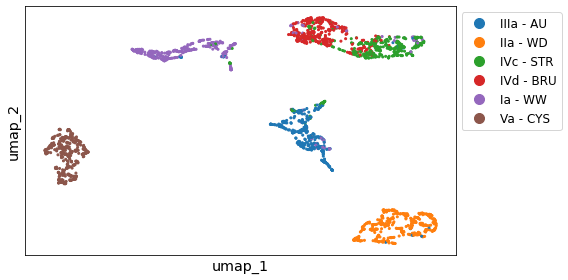

In [ ]:
PPs_perImgs = np.c_[ PPs_vectors_of_imgs, indices_images] 
#PPs_plus_Descriptors_perImgs[25,420] = 6

df_just_PP = pd.DataFrame(PPs_perImgs)
df_just_PP.columns=["F"+str(i) for i in range(1, len(df_just_PP.columns) + 1)]

last_column = "F"+str(len(df_just_PP.columns))
#print(last_column)
df_just_PP = df_just_PP.rename(columns={last_column: 'Class'})

#df_just_PP['Class'] = df_just_PP['Class'].map({0: 'IIIa - AU', 1: 'IIa - WD', 2: 'IVc - STR', 3: 'IVd - BRU', 4: 'Ia - WW', 5: 'Va - CYS'})#, 6: 'AU_test'})
df_just_PP['Class'] = df_just_PP['Class'].map({0: 'Ia - WW', 1: 'IIa - WD', 2: 'IIIa - AU' , 3: 'IVc - STR', 4: 'IVd - BRU', 5: 'Va - CYS'})#, 6: 'AU_test'})
#print(df_just_PP.head)

# PLOT UMAP IN 3D
data_umap_just_PP, y_umap_target_just_PP, umap_pps_transform = umap_plot(features_df = df_just_PP, #dataframe               
                      target_col='Class', # "target" column. It is the one that contains the class name.
                      dim="2d", #2d or 3d
                      knn_neighbors= 8, #10, # controls how UMAP balances local versus global structure in the data
                      min_dist= 0.05, #1.0, #0.08, #0.1, #min_dist=0.5, # controls how tightly UMAP is allowed to pack points together
                      #sample_size=MAX_REC, #Max number of samples (optional)
                      random_state= 2#2
                      )

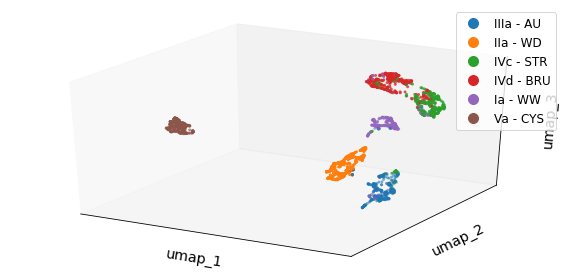

In [ ]:
PPs_perImgs = np.c_[ PPs_vectors_of_imgs, indices_images] 
#PPs_plus_Descriptors_perImgs[25,420] = 6

df_just_PP = pd.DataFrame(PPs_perImgs)
df_just_PP.columns=["F"+str(i) for i in range(1, len(df_just_PP.columns) + 1)]

last_column = "F"+str(len(df_just_PP.columns))
#print(last_column)
df_just_PP = df_just_PP.rename(columns={last_column: 'Class'})

#df_just_PP['Class'] = df_just_PP['Class'].map({0: 'IIIa - AU', 1: 'IIa - WD', 2: 'IVc - STR', 3: 'IVd - BRU', 4: 'Ia - WW', 5: 'Va - CYS'})#, 6: 'AU_test'})
df_just_PP['Class'] = df_just_PP['Class'].map({0: 'Ia - WW', 1: 'IIa - WD', 2: 'IIIa - AU' , 3: 'IVc - STR', 4: 'IVd - BRU', 5: 'Va - CYS'})#, 6: 'AU_test'})
#print(df_just_PP.head)

# PLOT UMAP IN 3D
data_umap_just_PP, y_umap_target_just_PP, umap_pps_transform = umap_plot(features_df = df_just_PP, #dataframe               
                      target_col='Class', # "target" column. It is the one that contains the class name.
                      dim="3d", #2d or 3d
                      knn_neighbors= 8, #10, # controls how UMAP balances local versus global structure in the data
                      min_dist= 0.05, #1.0, #0.08, #0.1, #min_dist=0.5, # controls how tightly UMAP is allowed to pack points together
                      #sample_size=MAX_REC, #Max number of samples (optional)
                      random_state= 2#2
                      )

In [ ]:
X_test = pd.DataFrame([[
    0.15280291,	0.1036572,	0.10107434,	7.8021274,	2.634679,	0.8532427,	0.09780463,	0.13006575,	0.12601446,	0.06340503,	0.11080156,	0.10118198,	0.114462554,	0.09660993,	0.15229683,	0.09691044,	0.14692515,	0.1467622 #, 'IIa - WD'
]])

X_test.columns=["F"+str(i) for i in range(1, len(X_test.columns) + 1)]
print(X_test)
img_PPn3 = umap_pps_transform.transform(X_test)
print("------------------------- ")
img_PPn3

         F1        F2        F3        F4        F5        F6        F7  \
0  0.152803  0.103657  0.101074  7.802127  2.634679  0.853243  0.097805   

         F8        F9       F10       F11       F12       F13      F14  \
0  0.130066  0.126014  0.063405  0.110802  0.101182  0.114463  0.09661   

        F15      F16       F17       F18  
0  0.152297  0.09691  0.146925  0.146762  
------------------------- 


array([[11.054024 , -4.4644594,  6.801486 ]], dtype=float32)

In [ ]:
data_umap_just_PP

array([[ 5.7017856, 15.27314  ,  4.453925 ],
       [ 6.178536 , 14.941599 ,  4.186123 ],
       [ 6.05905  , 14.968425 ,  4.251511 ],
       ...,
       [-4.3287125,  3.7175462,  6.546163 ],
       [-3.7029858,  3.298668 ,  5.470882 ],
       [-2.8450005,  2.8986928,  5.865518 ]], dtype=float32)

In [ ]:
data_umap_just_PP.shape

(2400, 3)

In [ ]:
df_just_PP

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,Class
0,1.694967,0.496653,0.357398,0.150585,0.106430,0.496865,0.500352,0.942615,1.328507,0.160281,0.584575,0.465607,3.133107,6.103397,2.462010,0.314839,2.420841,2.212826,Ia - WW
1,1.757141,0.777137,0.509321,0.339919,0.178843,2.370688,0.446044,0.854525,1.160275,0.148845,0.529573,0.419105,2.626380,4.475250,2.654985,0.324306,2.782370,2.506873,Ia - WW
2,1.878429,0.805574,0.543463,0.525134,0.196367,1.460603,0.353120,0.665862,0.859154,0.140636,0.498266,0.372275,4.544087,4.539880,3.175804,0.315031,2.645932,2.328388,Ia - WW
3,1.948664,0.775267,0.521542,0.345408,0.163201,1.186362,0.353868,0.661376,0.867190,0.134729,0.448421,0.340582,2.962038,4.837574,3.453239,0.311542,2.742958,2.575278,Ia - WW
4,2.100214,0.612155,0.422744,0.419258,0.187909,1.786254,0.337037,0.627778,0.813592,0.134435,0.447619,0.341484,3.132947,5.119133,4.461594,0.333628,3.345495,3.178829,Ia - WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1.976955,0.516741,0.415387,0.315044,0.272937,1.133822,0.305071,0.596829,0.745885,0.118413,0.377687,0.306491,0.485085,0.330562,3.742400,3.973902,4.176162,4.305286,Va - CYS
2396,1.983197,0.523099,0.371576,0.214710,0.391678,0.992875,0.305220,0.597134,0.746507,0.118811,0.380086,0.307846,0.492006,0.334604,3.846205,5.946521,3.917374,4.778732,Va - CYS
2397,1.956005,0.505104,0.353790,0.441733,0.226109,2.987196,0.302291,0.589902,0.738981,0.118618,0.379337,0.307107,0.490254,0.333302,3.839047,7.541065,4.008106,5.097317,Va - CYS
2398,1.978081,0.508272,0.358349,0.473207,0.205582,2.462797,0.305485,0.595771,0.749582,0.119250,0.382516,0.309457,0.496856,0.337428,3.846205,3.447491,4.628417,6.279511,Va - CYS


## Saving with Pandas on Drive:

In [ ]:
PPs_plus_Descriptors_perImgs_firstColumn = np.c_[ indices_images, PPs_plus_Descriptor_vectors_of_imgs] 
PPs_plus_Descriptors_perImgs_lastColumn  = np.c_[ PPs_plus_Descriptor_vectors_of_imgs, indices_images] 

In [ ]:
#dir_pandas_first = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/{}".format('KS_YE_Mix_train_PPsnD_local_perImgs_firstColumn.csv')
#dir_pandas_last = "/content/drive/MyDrive/ProtoPNets/KS_YE/Mixed/{}".format('KS_YE_Mix_train_PPsnD_local_perImgs_lastColumn.csv')

In [ ]:
dir_pandas_first = "/content/drive/MyDrive/{}".format('Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_perImgs_firstColumn.csv')
dir_pandas_last = "/content/drive/MyDrive/{}".format('Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/descriptors/densenet201_015_pps3_OsDA/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_local_perImgs_lastColumn.csv')

In [ ]:
df_simple_PPnD_on_Imgs_perClass_FirstColumn = pd.DataFrame(PPs_plus_Descriptors_perImgs_firstColumn)
df_simple_PPnD_on_Imgs_perClass_LastColumn = pd.DataFrame(PPs_plus_Descriptors_perImgs_lastColumn)

In [ ]:
df_simple_PPnD_on_Imgs_perClass_FirstColumn.to_csv(dir_pandas_first)
df_simple_PPnD_on_Imgs_perClass_LastColumn.to_csv(dir_pandas_last)

# plotly interactive plot
# Only PPs

In [ ]:
data_umap_just_PP.shape

(2400, 3)

In [ ]:
data_umap_just_PP

array([[ 5.7017856, 15.27314  ,  4.453925 ],
       [ 6.178536 , 14.941599 ,  4.186123 ],
       [ 6.05905  , 14.968425 ,  4.251511 ],
       ...,
       [-4.3287125,  3.7175462,  6.546163 ],
       [-3.7029858,  3.298668 ,  5.470882 ],
       [-2.8450005,  2.8986928,  5.865518 ]], dtype=float32)

In [ ]:
y_umap_target_just_PP

0        Ia - WW
1        Ia - WW
2        Ia - WW
3        Ia - WW
4        Ia - WW
          ...   
2395    Va - CYS
2396    Va - CYS
2397    Va - CYS
2398    Va - CYS
2399    Va - CYS
Name: Class, Length: 2400, dtype: object

In [ ]:
PP_UmapData = np.c_[ y_umap_target_just_PP, data_umap_just_PP]
df_PP_UmapData = pd.DataFrame(PP_UmapData)
df_PP_UmapData.columns=["F"+str(i) for i in range(len(df_PP_UmapData.columns))]
df_PP_UmapData = df_PP_UmapData.rename(columns={"F0": 'Class'})
df_PP_UmapData

,Class,F1,F2,F3
0,Ia - WW,5.701786,15.27314,4.453925
1,Ia - WW,6.178536,14.941599,4.186123
2,Ia - WW,6.05905,14.968425,4.251511
3,Ia - WW,6.146389,14.91328,4.480016
4,Ia - WW,6.537354,14.947178,4.293918
...,...,...,...,...
2395,Va - CYS,-3.084943,2.940139,5.776769
2396,Va - CYS,-3.89865,3.456595,6.576522
2397,Va - CYS,-4.328712,3.717546,6.546163
2398,Va - CYS,-3.702986,3.298668,5.470882


In [ ]:
import plotly.express as px
#df = px.data.iris()
#fig = px.scatter_3d(df, x='Umap1', y='Umap2', z='Umap3', color='species')

#df_PP_UmapData
fig = px.scatter_3d(df_PP_UmapData, x='F1', y='F2', z='F3',
                    color='Class'
                    )
fig.update_traces(marker={'size': 1.2})
fig.show()

In [ ]:
PP_UmapData.shape

(2400, 4)

In [ ]:
Umap_row_numeration = [i for i in range(0, (PP_UmapData.shape[0]))]
PP_UmapData_row_numeration = np.c_[ Umap_row_numeration, PP_UmapData]

df_PP_UmapData_row_numeration = pd.DataFrame(PP_UmapData_row_numeration)
df_PP_UmapData_row_numeration.columns=["F"+str(i) for i in range(-1,len(df_PP_UmapData.columns))]
df_PP_UmapData_row_numeration = df_PP_UmapData_row_numeration.rename(columns={"F-1": 'Numberation', "F0": 'Class'})
df_PP_UmapData_row_numeration

,Numberation,Class,F1,F2,F3
0,0,Ia - WW,5.701786,15.27314,4.453925
1,1,Ia - WW,6.178536,14.941599,4.186123
2,2,Ia - WW,6.05905,14.968425,4.251511
3,3,Ia - WW,6.146389,14.91328,4.480016
4,4,Ia - WW,6.537354,14.947178,4.293918
...,...,...,...,...,...
2395,2395,Va - CYS,-3.084943,2.940139,5.776769
2396,2396,Va - CYS,-3.89865,3.456595,6.576522
2397,2397,Va - CYS,-4.328712,3.717546,6.546163
2398,2398,Va - CYS,-3.702986,3.298668,5.470882


In [ ]:
df_umap_plus_output = pd.concat([df_PP_UmapData_row_numeration, df_array_KSYE_2k_Mix_test_outputs], axis=1)
df_umap_plus_img_name = pd.concat([df_imgs_names_list, df_PP_UmapData_row_numeration], axis=1)
df_umap_plus_img_name

,image,Numberation,Class,F1,F2,F3
0,14811 - section 1-1.png,0,Ia - WW,5.701786,15.27314,4.453925
1,14811 - section 1-10.png,1,Ia - WW,6.178536,14.941599,4.186123
2,14811 - section 1-11.png,2,Ia - WW,6.05905,14.968425,4.251511
3,14811 - section 1-12.png,3,Ia - WW,6.146389,14.91328,4.480016
4,14811 - section 1-13.png,4,Ia - WW,6.537354,14.947178,4.293918
...,...,...,...,...,...,...
2395,4066 - surface 4-5.png,2395,Va - CYS,-3.084943,2.940139,5.776769
2396,4066 - surface 4-6.png,2396,Va - CYS,-3.89865,3.456595,6.576522
2397,4066 - surface 4-7.png,2397,Va - CYS,-4.328712,3.717546,6.546163
2398,4066 - surface 4-8.png,2398,Va - CYS,-3.702986,3.298668,5.470882


In [ ]:
df_umap_plus_output

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9
0,0,Ia - WW,5.701786,15.27314,4.453925,MIX-Subtype_Ia,14811 - section 1-1.png,4,4,-4.762806,-12.357465,-6.570512,-5.352190,6.374973,-8.176288
1,1,Ia - WW,6.178536,14.941599,4.186123,MIX-Subtype_Ia,14811 - section 1-10.png,4,4,-4.217830,-9.792542,-7.454663,-5.823901,3.157254,-7.678110
2,2,Ia - WW,6.05905,14.968425,4.251511,MIX-Subtype_Ia,14811 - section 1-11.png,4,4,-4.411952,-11.378701,-8.699482,-6.320522,6.390824,-8.887551
3,3,Ia - WW,6.146389,14.91328,4.480016,MIX-Subtype_Ia,14811 - section 1-12.png,4,4,-3.921875,-11.365043,-8.088356,-6.036555,5.423798,-7.592276
4,4,Ia - WW,6.537354,14.947178,4.293918,MIX-Subtype_Ia,14811 - section 1-13.png,4,4,-5.142592,-12.120624,-9.626263,-7.004844,6.163960,-7.837791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,Va - CYS,-3.084943,2.940139,5.776769,MIX-Subtype_Va,4066 - surface 4-5.png,5,5,-4.248386,-11.273198,-8.080029,-6.296717,-4.201184,3.311113
2396,2396,Va - CYS,-3.89865,3.456595,6.576522,MIX-Subtype_Va,4066 - surface 4-6.png,5,5,-5.144184,-12.830399,-8.950605,-7.015563,-5.066028,5.370039
2397,2397,Va - CYS,-4.328712,3.717546,6.546163,MIX-Subtype_Va,4066 - surface 4-7.png,5,5,-6.602128,-12.291159,-10.784968,-8.321315,-6.947129,6.133261
2398,2398,Va - CYS,-3.702986,3.298668,5.470882,MIX-Subtype_Va,4066 - surface 4-8.png,5,5,-5.361039,-11.012855,-9.536087,-7.305217,-5.454185,3.871416


In [ ]:
!pip install kaleido
import kaleido #required
kaleido.__version__ #0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'0.2.1'

In [ ]:
#!pip install -U kaleido

import os
#import kaleido
import plotly.express as px

#df_PP_UmapData
#fig = px.scatter_3d(df_PP_UmapData_row_numeration, x='F1', y='F2', z='F3',
#fig = plt.gcf()
fig = px.scatter_3d(df_umap_plus_img_name, x='F1', y='F2', z='F3',
                    color='Class', #smoker #Class
                    #hover_data={'Numberation': True, 'subdir': True, 'filename': True,'predicted_cls': True,'correct_cls': True},
                    hover_data={'Numberation': True, 'image': True},
                    width =1200, 
                    height=1000,
                    #colorscale="Viridis",
                    )
fig.update_traces(marker= dict(size = 4, line=dict(width=2, color='darkslateblue'))  )
fig.update_layout(legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  legend_title = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  #gridcolor='black'
                  )
fig.update_scenes(xaxis_gridcolor="black", yaxis_gridcolor="black", zaxis_gridcolor="black",
                  xaxis_gridwidth=1.5,     yaxis_gridwidth=1.5,     zaxis_gridwidth=1.5,
                  )

#fig.write_image("figure.pdf", engine="kaleido")
fig.show()

In [ ]:
##fig.write_image("fig1.svg")
import plotly
plotly.offline.plot(fig, image_filename="fig_onlyPP_KSJE6cW256_Mix", image='svg')
#iplot(fig, image='svg', filename='scatterplot.svg', image_width=1280, image_height=1280)
#px.offline.plot(fig, image_filename="fig1", image='svg')

'temp-plot.html'

In [ ]:
#fig.write_image("fig1.pdf")

#px.offline.plot(fig, image_filename="20221104_ProtoPNet_DenseNet201_015_3pps_JE_Mix_6c_w256", image='svg')

### might need to wait for plot to download before copying
#time.sleep(1)

In [ ]:
# Derive a new column from existing column
#df_umap_plus_output['Wrong_output'] = np.select([df_umap_plus_output.predicted_cls == df_umap_plus_output.correct_cls , df_umap_plus_output.predicted_cls != df_umap_plus_output.correct_cls], [0, 1], default = -1)
df_umap_plus_output['Wrong_output'] = np.select([df_umap_plus_output.predicted_cls == df_umap_plus_output.correct_cls , df_umap_plus_output.predicted_cls != df_umap_plus_output.correct_cls], [0, 1], default = -1)
#df_array_KSYE_2k_Mix_test_outputs

#df_umap_plus_output['Wrong_output'] = 1 if (df_umap_plus_output['predicted_cls'] == df['correct_cls'])
df_umap_plus_output

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9,Wrong_output
0,0,Ia - WW,5.701786,15.27314,4.453925,MIX-Subtype_Ia,14811 - section 1-1.png,4,4,-4.762806,-12.357465,-6.570512,-5.352190,6.374973,-8.176288,0
1,1,Ia - WW,6.178536,14.941599,4.186123,MIX-Subtype_Ia,14811 - section 1-10.png,4,4,-4.217830,-9.792542,-7.454663,-5.823901,3.157254,-7.678110,0
2,2,Ia - WW,6.05905,14.968425,4.251511,MIX-Subtype_Ia,14811 - section 1-11.png,4,4,-4.411952,-11.378701,-8.699482,-6.320522,6.390824,-8.887551,0
3,3,Ia - WW,6.146389,14.91328,4.480016,MIX-Subtype_Ia,14811 - section 1-12.png,4,4,-3.921875,-11.365043,-8.088356,-6.036555,5.423798,-7.592276,0
4,4,Ia - WW,6.537354,14.947178,4.293918,MIX-Subtype_Ia,14811 - section 1-13.png,4,4,-5.142592,-12.120624,-9.626263,-7.004844,6.163960,-7.837791,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,Va - CYS,-3.084943,2.940139,5.776769,MIX-Subtype_Va,4066 - surface 4-5.png,5,5,-4.248386,-11.273198,-8.080029,-6.296717,-4.201184,3.311113,0
2396,2396,Va - CYS,-3.89865,3.456595,6.576522,MIX-Subtype_Va,4066 - surface 4-6.png,5,5,-5.144184,-12.830399,-8.950605,-7.015563,-5.066028,5.370039,0
2397,2397,Va - CYS,-4.328712,3.717546,6.546163,MIX-Subtype_Va,4066 - surface 4-7.png,5,5,-6.602128,-12.291159,-10.784968,-8.321315,-6.947129,6.133261,0
2398,2398,Va - CYS,-3.702986,3.298668,5.470882,MIX-Subtype_Va,4066 - surface 4-8.png,5,5,-5.361039,-11.012855,-9.536087,-7.305217,-5.454185,3.871416,0


In [ ]:
# Derive a new column from existing column
df_umap_plus_output['Wrong_output_opacity'] = np.select([df_umap_plus_output.predicted_cls == df_umap_plus_output.correct_cls , df_umap_plus_output.predicted_cls != df_umap_plus_output.correct_cls], [0.4, 0.99], default = -1)
df_umap_plus_output['Wrong_output_size'] = np.select([df_umap_plus_output.predicted_cls == df_umap_plus_output.correct_cls , df_umap_plus_output.predicted_cls != df_umap_plus_output.correct_cls], [2, 3], default = -1)

df_img_PPn3 = pd.DataFrame(img_PPn3, columns = ['F1','F2','F3'])
df_img_PPn3['subdir'] = ['MIX-Subtype_IIa']
df_img_PPn3['filename'] = ['21810 - surface 5-34']
df_img_PPn3['predicted_cls'] = [1]
df_img_PPn3['correct_cls'] = [1]
df_img_PPn3['F4'] = [-3.90883469581604]
df_img_PPn3['F5'] = [9.81202602386474]
df_img_PPn3['F6'] = [-5.88181543350219]
df_img_PPn3['F7'] = [-4.48411035537719]
df_img_PPn3['F8'] = [-5.64536142349243]
df_img_PPn3['F9'] = [-6.22621440887451]
df_img_PPn3['Wrong_output'] = [3]           # This parameter is used to select the shape of the "data point" in the plot
df_img_PPn3['Wrong_output_opacity'] = [0.4] # This parameter is not been used
df_img_PPn3['Wrong_output_size'] = [5]      # This parameter is used to select the size of the "data point"

df_img_PPn3.insert(0, "Numberation", [2400], True)
df_img_PPn3.insert(1, "Class", ['IIa - WD'], True)

###df_umap_plus_output['Wrong_output'] = 1 if (df_umap_plus_output['predicted_cls'] == df['correct_cls'])
#print(df_umap_plus_output)
#print(df_img_PPn3)

df_umap_plus_output = df_umap_plus_output.append(df_img_PPn3)
#df_umap_plus_output.iloc[[2400]] = df_img_PPn3
df_umap_plus_output

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9,Wrong_output,Wrong_output_opacity,Wrong_output_size
0,0,Ia - WW,5.701786,15.27314,4.453925,MIX-Subtype_Ia,14811 - section 1-1.png,4,4,-4.762806,-12.357465,-6.570512,-5.352190,6.374973,-8.176288,0,0.4,2
1,1,Ia - WW,6.178536,14.941599,4.186123,MIX-Subtype_Ia,14811 - section 1-10.png,4,4,-4.217830,-9.792542,-7.454663,-5.823901,3.157254,-7.678110,0,0.4,2
2,2,Ia - WW,6.05905,14.968425,4.251511,MIX-Subtype_Ia,14811 - section 1-11.png,4,4,-4.411952,-11.378701,-8.699482,-6.320522,6.390824,-8.887551,0,0.4,2
3,3,Ia - WW,6.146389,14.91328,4.480016,MIX-Subtype_Ia,14811 - section 1-12.png,4,4,-3.921875,-11.365043,-8.088356,-6.036555,5.423798,-7.592276,0,0.4,2
4,4,Ia - WW,6.537354,14.947178,4.293918,MIX-Subtype_Ia,14811 - section 1-13.png,4,4,-5.142592,-12.120624,-9.626263,-7.004844,6.163960,-7.837791,0,0.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,2397,Va - CYS,-4.328712,3.717546,6.546163,MIX-Subtype_Va,4066 - surface 4-7.png,5,5,-6.602128,-12.291159,-10.784968,-8.321315,-6.947129,6.133261,0,0.4,2
2398,2398,Va - CYS,-3.702986,3.298668,5.470882,MIX-Subtype_Va,4066 - surface 4-8.png,5,5,-5.361039,-11.012855,-9.536087,-7.305217,-5.454185,3.871416,0,0.4,2
2399,2399,Va - CYS,-2.845001,2.898693,5.865518,MIX-Subtype_Va,4066 - surface 4-9.png,5,5,-3.912036,-9.485332,-7.858341,-6.025253,-3.350661,0.817772,0,0.4,2
0,2400,IIa - WD,11.054024,-4.464459,6.801486,MIX-Subtype_IIa,21810 - surface 5-34,1,1,-3.908835,9.812026,-5.881815,-4.484110,-5.645361,-6.226214,3,0.4,2


In [ ]:
print(df_umap_plus_output.nunique())
print(" ")
print("------------------------------- ")
print(df_umap_plus_output.dtypes)
print(" ")
print("------------------------------- ")
df_umap_plus_output['Wrong_output_opacity'].unique()

Numberation             2401
Class                      6
F1                      2401
F2                      2401
F3                      2401
subdir                     6
filename                2401
predicted_cls              6
correct_cls                6
F4                      2399
F5                      2401
F6                      2401
F7                      2401
F8                      2401
F9                      2401
Wrong_output               3
Wrong_output_opacity       2
Wrong_output_size          3
dtype: int64
 
------------------------------- 
Numberation              object
Class                    object
F1                       object
F2                       object
F3                       object
subdir                   object
filename                 object
predicted_cls             int64
correct_cls               int64
F4                      float64
F5                      float64
F6                      float64
F7                      float64
F8            

array([0.4 , 0.99])

In [ ]:
# img_PPn3 

# df_PP_UmapData
# df_PP_UmapData_row_numeration
#df_umap_plus_output
#np_Wrong_output_opacity = df_umap_plus_output['Wrong_output_opacity'].to_numpy()
fig = px.scatter_3d(df_umap_plus_output, x='F1', y='F2', z='F3',
                    color='Class',
                    hover_data={'Numberation': True, 'subdir': True, 'filename': True,'predicted_cls': True,'correct_cls': True},
                    #opacity= np_Wrong_output_opacity, #0.7, #'Wrong_output_opacity', #df_umap_plus_output['Wrong_output'], #0.7, #'Wrong_output_opacity',
                    symbol='Wrong_output',
                    width =1500, 
                    height=1000,
                    size = 'Wrong_output_size'
                    #showarrow = True,
                    #fillcolor='rgba(26,150,65,0.5)',
                    )
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), legend = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  legend_title = dict(font = dict(family = "Arial", size = 15, color = "black")),
                  )
#fig.update_layout(legend = dict(font = dict(family = "Arial", size = 15, color = "black")), legend_title = dict(font = dict(family = "Arial", size = 15, color = "black")), )
                  #gridcolor='black' )

#fig.update_traces(marker_color='Wrong_output_opacity', marker= dict(line=dict(width=2, color='darkslateblue')), ) #Viridis #darkslateblue #colorscale='Viridis',  
fig.update_traces(marker= dict(line=dict(width=2, color='darkslateblue')), ) #Viridis #darkslateblue #colorscale='Viridis',  

fig.update_scenes(xaxis_gridcolor="black", yaxis_gridcolor="black", zaxis_gridcolor="black",
                  xaxis_gridwidth=1.5,     yaxis_gridwidth=1.5,     zaxis_gridwidth=1.5,
                  )
#fig.defaults.color_continuous_scale = df_umap_plus_output['Wrong_output']
#fig.color_continuous_scale = df_umap_plus_output['Wrong_output']
#layout.scene.annotations[]
fig.show()

In [ ]:
np_Wrong_output_opacity

array([0.4, 0.4, 0.4, ..., 0.4, 0.4, 0.4])

In [ ]:
#count unique 'points' values, grouped by team
print(df_umap_plus_output.groupby('Class')['Wrong_output'].nunique())
print(" ")
print("------------------------------- ")
print(df_umap_plus_output.groupby('Class')['Wrong_output'].unique())
print(" ")
print("------------------------------- ")
df_umap_plus_output.groupby('Class')['Wrong_output'].sum() #axis=0)
#df_umap_plus_output.groupby('Wrong_output')['Class'].nunique()

Class
IIIa - AU    2
IIa - WD     2
IVc - STR    2
IVd - BRU    2
Ia - WW      2
Va - CYS     2
Name: Wrong_output, dtype: int64
 
------------------------------- 
Class
IIIa - AU    [0, 1]
IIa - WD     [0, 3]
IVc - STR    [0, 1]
IVd - BRU    [0, 1]
Ia - WW      [0, 1]
Va - CYS     [0, 1]
Name: Wrong_output, dtype: object
 
------------------------------- 


Class
IIIa - AU     40
IIa - WD       3
IVc - STR     76
IVd - BRU     74
Ia - WW      113
Va - CYS       2
Name: Wrong_output, dtype: int64

In [ ]:
df_umap_wrong_outputs = df_umap_plus_output[df_umap_plus_output['Wrong_output'] == 1]
df_umap_wrong_outputs

,Numberation,Class,F1,F2,F3,subdir,filename,predicted_cls,correct_cls,F4,F5,F6,F7,F8,F9,Wrong_output,Wrong_output_opacity,Wrong_output_size
5,5,Ia - WW,6.810548,12.964084,6.455526,MIX-Subtype_Ia,14811 - section 1-14.png,2,4,-5.811856,-15.757483,-1.592553,-3.694532,-2.164226,-9.287083,1,0.99,2.5
14,14,Ia - WW,6.247142,13.083034,6.457155,MIX-Subtype_Ia,14811 - section 1-22.png,3,4,-6.362994,-16.202381,-4.618291,-0.252967,-2.688457,-9.928594,1,0.99,2.5
15,15,Ia - WW,6.62299,13.096781,6.63736,MIX-Subtype_Ia,14811 - section 1-23.png,3,4,-7.533203,-18.890156,-3.926707,0.318784,-3.426962,-12.466901,1,0.99,2.5
17,17,Ia - WW,6.130649,13.630604,6.381869,MIX-Subtype_Ia,14811 - section 1-25.png,3,4,-9.177371,-18.114363,-6.875931,-0.501670,-0.710694,-14.700484,1,0.99,2.5
26,26,Ia - WW,6.132349,13.632286,6.384009,MIX-Subtype_Ia,14811 - section 1-33.png,3,4,-9.544818,-20.758381,-6.403266,0.186023,0.063568,-15.735763,1,0.99,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,IVd - BRU,10.40508,10.013328,12.094752,MIX-Subtype_IVd,36068 - surface 2-54.png,2,3,-5.226369,-12.173739,0.561600,-3.115324,-6.985120,-8.968299,1,0.99,2.5
1996,1996,IVd - BRU,10.320835,10.002277,11.339019,MIX-Subtype_IVd,36068 - surface 2-6.png,2,3,-4.916546,-13.119449,0.706186,-3.988870,-3.687101,-9.928394,1,0.99,2.5
1997,1997,IVd - BRU,9.838261,9.801896,11.849012,MIX-Subtype_IVd,36068 - surface 2-7.png,2,3,-5.276707,-13.813382,-0.525928,-2.028456,-6.125321,-8.748384,1,0.99,2.5
2265,2265,Va - CYS,8.771645,8.411778,0.578278,MIX-Subtype_Va,25322 - surface 2-23.png,0,5,-0.267680,-11.615087,-5.447188,-5.268688,-3.819814,-3.081380,1,0.99,2.5


In [ ]:
#dir_pandas_wrongOutputs = "/content/drive/MyDrive/{}".format('Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/pps_results/JE_Mix_6c_w256_OsDA/densenet201_015_pps3/DenseNet201_JE_6c_Mix_w256_003pps_OsDAtestset_wrongOutputs.csv')
#df_umap_wrong_outputs.to_csv(dir_pandas_wrongOutputs)

In [ ]:
dir_pandas_wrongOutputs = "/content/drive/MyDrive/{}".format('Writing/Ongoing_Papers/Ongoing_Papers_2022/ISBI/pps_results/JE_Mix_6c_w256_OsDA/densenet201_015_pps3/DenseNet201_JE_6c_Mix_w256_003pps_OsDA_testset_logist_umap.csv')
df_umap_plus_output.to_csv(dir_pandas_wrongOutputs)

In [ ]:
# df_PP_UmapData
# df_PP_UmapData_row_numeration
#df_umap_plus_output
fig = px.scatter_3d(df_umap_plus_output, x='F1', y='F2', z='F3',
                    color='Wrong_output',
                    hover_data={'Numberation': True, 'subdir': True, 'filename': True,'predicted_cls': True,'correct_cls': True},
                    #opacity=0.7,
                    #symbol='Wrong_output',
                    )
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

In [ ]:
# max value for each numerical column in the dataframe
df_umap_plus_output.max(numeric_only=True)

predicted_cls            5.000000
correct_cls              5.000000
F4                       9.770877
F5                      12.500257
F6                       8.336304
F7                       8.018974
F8                      10.173336
F9                      13.206901
Wrong_output             3.000000
Wrong_output_opacity     0.990000
Wrong_output_size        5.000000
dtype: float64

# Dash 
## Not implemented YET

In [ ]:
!pip install dash

In [ ]:
from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
import pandas as pd

## create sample random data
df = pd.DataFrame({
    'x': [1,2,3],
    'y': [2,3,4],
    'z': [3,4,5],
    'color': ['red','green','blue'],
    'img_url': [
        "https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Stack_Overflow_logo.svg/2880px-Stack_Overflow_logo.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/3/37/Plotly-logo-01-square.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png"
    ]
})

fig = go.Figure(data=[
    go.Scatter3d(
        x=df['x'], 
        y=df['y'], 
        z=df['z'],
        mode='markers',
        marker=dict(color=df['color'])
    )
])

# turn off native plotly.js hover effects - make sure to use
# hoverinfo="none" rather than "skip" which also halts events.
fig.update_traces(hoverinfo="none", hovertemplate=None)
fig.update_layout(
    scene = dict(
        xaxis = dict(range=[-1,8],),
                     yaxis = dict(range=[-1,8],),
                     zaxis = dict(range=[-1,8],),
    ),
)
app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph-basic-2", figure=fig, clear_on_unhover=True),
    dcc.Tooltip(id="graph-tooltip"),
])


@app.callback(
    Output("graph-tooltip", "show"),
    Output("graph-tooltip", "bbox"),
    Output("graph-tooltip", "children"),
    Input("graph-basic-2", "hoverData"),
)
def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update

    # demo only shows the first point, but other points may also be available
    pt = hoverData["points"][0]
    bbox = pt["bbox"]
    num = pt["pointNumber"]

    df_row = df.iloc[num]
    img_src = df_row['img_url']

    children = [
        html.Div([
            html.Img(src=img_src, style={"width": "100%"}),
        ], style={'width': '100px', 'white-space': 'normal'})
    ]

    return True, bbox, children

if __name__ == "__main__":
    app.run_server(debug=True)